In [2]:
import geopandas as gpd
import deckgljupyter.Layer as deckgl
#from geoband.API import *

#GetCompasData('../data/PJT001_h_100m_cell_flow.geojson')

In [8]:
df_pop = gpd.read_file('../data/PJT001_h_100m_cell_flow.geojson')
df_pop.shape

(136571, 28)

In [9]:
type(df_pop)

geopandas.geodataframe.GeoDataFrame

In [10]:
df_pop['ymd'] = df_pop['ymd'].astype('int')

In [11]:
df_pop = df_pop[df_pop['ymd']==20180701]
df_pop.reset_index(drop=True, inplace=True)
df_pop.fillna(0, inplace=True)
df_pop.shape

(30844, 28)

In [12]:
target_time = 't08_09'
max_value = df_pop[target_time].max()
default = 70

# 시각화 함수에 넣어줄 형태로 데이터를 만듭니다.
data = []
for idx, row in df_pop[['geometry', target_time]].iterrows():
    lonlat = [[lon, lat] for lon, lat in zip(*df_pop['geometry'].iloc[idx].exterior.coords.xy)]
    data.append({
        'polygon': lonlat,
        'value': row[target_time],
        'color': [255, 0, 0, default + 255 * row[target_time] / max_value]
    })

In [13]:
data

[{'polygon': [[126.86812607564225, 37.09967182993606],
   [126.86925099089423, 37.099673075599256],
   [126.86925253932039, 37.09877201066015],
   [126.8681276373904, 37.09877076503741],
   [126.86812607564225, 37.09967182993606]],
  'value': 0.42,
  'color': [255, 0, 0, 70.26374762971902]},
 {'polygon': [[126.87150234338638, 37.09877446989289],
   [126.87262724552122, 37.09877568350289],
   [126.87262875391431, 37.09787461830716],
   [126.87150386510089, 37.09787340473659],
   [126.87150234338638, 37.09877446989289]],
  'value': 0.03,
  'color': [255, 0, 0, 70.0188391164085]},
 {'polygon': [[126.87150082160419, 37.09967553491189],
   [126.872625737061, 37.099676748561315],
   [126.87262724552122, 37.09877568350289],
   [126.87150234338638, 37.09877446989289],
   [126.87150082160419, 37.09967553491189]],
  'value': 0.03,
  'color': [255, 0, 0, 70.0188391164085]},
 {'polygon': [[126.86924944239918, 37.10057414040105],
   [126.87037437104262, 37.10057537543312],
   [126.87037590621507, 3

In [14]:
access_token = 'pk.eyJ1IjoiZGFlZG9sIiwiYSI6ImNqZGpqbmpnYzFscm8yd245YXM5MWQxeGgifQ.ACxKlSjUthNpixmVX2faMw'
view_options = {
    'center': [126.908, 37.132],
    'zoom': 12,
    'bearing': 0,
    'pitch': 60,
    'style': 'mapbox://styles/mapbox/dark-v9',
    'access_token': access_token
}

m = deckgl.Map(**view_options)
m.add(deckgl.PolygonLayer(data,
                          getElevation=1,
                          getFillColor='d => d.color',
                          tooltip=["value"],
                          pickable=True))
m.show()

/home/sugyeong/anaconda3/envs/ox/lib/python3.8/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [58]:
data[4]

{'polygon': [[126.87149777783675, 37.10147766453797],
  [126.87262271993933, 37.10147887826624],
  [126.87262422853371, 37.10057781348243],
  [126.87149929975432, 37.10057659979358],
  [126.87149777783675, 37.10147766453797]],
 'value': 0.01,
 'color': [255, 0, 0, 70.0062797054695]}

False
False


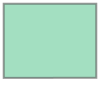

In [95]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import numpy as np
#lons_lats_vect = np.column_stack((lons_vect, lats_vect)) # Reshape coordinates
polygon=Polygon(data[10000]['polygon'])
point = Point(np.array([37.181517,127.109517]))


print(polygon.contains(point)) # check if polygon contains point
print(point.within(polygon)) # check if a point is in the polygon 
polygon

In [59]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

lons_lats_vect = np.column_stack((lons_vect, lats_vect)) # Reshape coordinates
polygon = Polygon(lons_lats_vect) # create polygon
point = Point(y,x) # create point
print(polygon.contains(point)) # check if polygon contains point
print(point.within(polygon)) # check if a point is in the polygon 

In [86]:
m = deckgl.Map(**view_options)
m.add(deckgl.PolygonLayer(data[100:150],
                          getElevation=1,
                          getFillColor='d => d.color',
                          tooltip=["value"],
                          pickable=True))
m.show()